In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
train = data.data
target = data.target
print(train.shape)

num_cols = train.shape[1]

(150, 4)


## 標準化

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train)

train_ss = scaler.transform(train)
print(np.mean(train_ss, axis=0))
print(np.std(train_ss, axis=0))

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]


## Min-Maxスケーリング

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)

train_mm = scaler.transform(train)
print(np.min(train_mm, axis=0))
print(np.max(train_mm, axis=0))

[0. 0. 0. 0.]
[1. 1. 1. 1.]


## 非線形変換

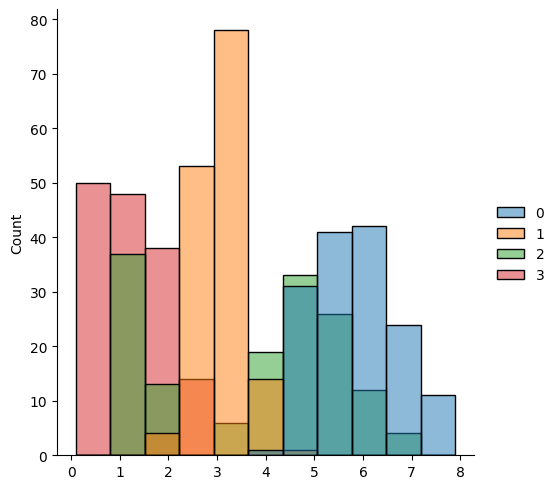

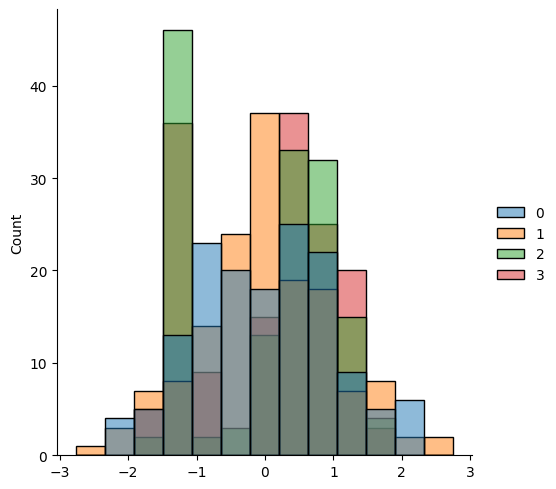

In [38]:
x1 = np.log(train)

x2 = np.log1p(train)

x3 = np.sign(train) * np.log(np.abs(train))

# Box-Cox変換(Yeo-Johnsonも同様)
pos_cols = [c for c in range(num_cols) if (train[c] > 0.0).all()]

from sklearn.preprocessing import PowerTransformer
import seaborn as sns


pt = PowerTransformer(method='box-cox')
pt.fit(train)
train_bc = pt.transform(train)

sns.displot(train)
sns.displot(train_bc)

## Clipping

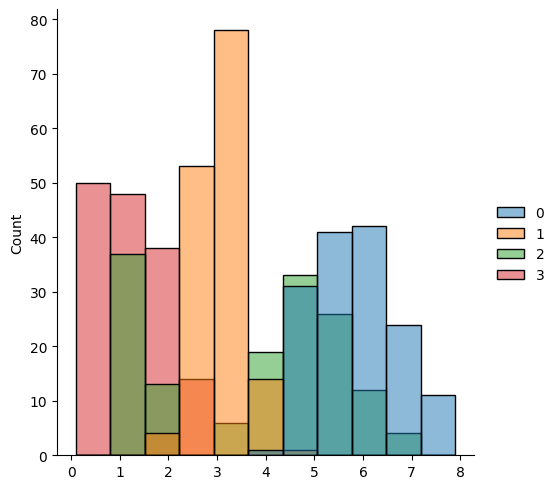

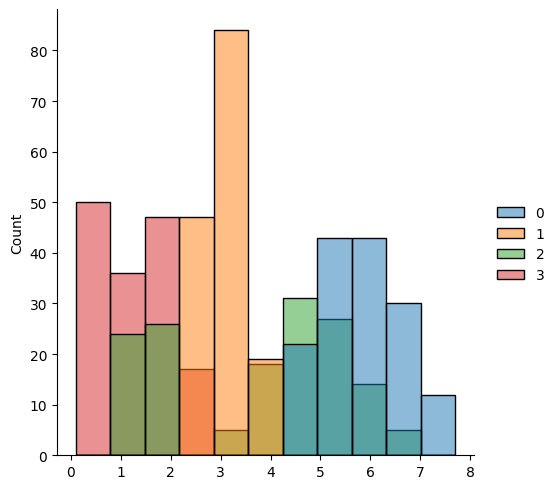

In [48]:
p01 = np.quantile(train, 0.01, axis=0)
p99 = np.quantile(train, 0.99, axis=0)

train_clip = train.clip(p01, p99)

sns.displot(train)
sns.displot(train_clip)

## Binning

In [52]:
x = [1, 7, 5, 4, 6, 3]

binned = pd.cut(x, 3, labels=False)
print(binned)

bin_edges = [-float('inf'), 3.0, 5.0, float('inf')]
binned = pd.cut(x, bin_edges, labels=False)
print(binned)

[0 2 1 1 2 0]
[0 2 1 1 2 0]


## 順位への変換

In [54]:
x = [10, 20, 30, 0, 40, 40]

rank = pd.Series(x).rank()
print(rank.values)

order = np.argsort(x)
rank = np.argsort(order)
print(rank)

[2.  3.  4.  1.  5.5 5.5]
[1 2 3 0 4 5]


## RankGaus

In [57]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(train)

train_rg = transformer.transform(train)

